In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns

In [2]:
data=pd.read_csv('medicine2.csv')

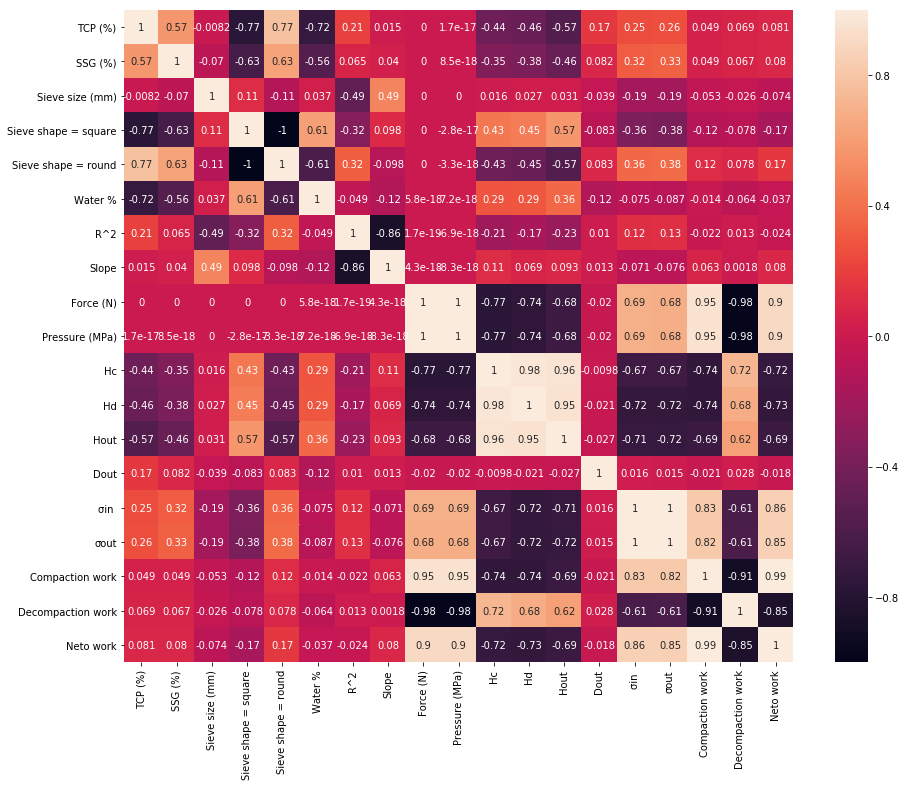

In [3]:
plot.rcParams["figure.figsize"] = [15,12]
sns.heatmap(data.corr(), annot= True)

In [4]:
data.columns

Index(['TCP (%)', 'SSG (%)', 'Sieve size (mm)', 'Sieve shape = square',
       'Sieve shape = round', 'Water %', 'R^2', 'Slope', 'Force (N)',
       'Pressure (MPa)', 'Hc', 'Hd', 'Hout', 'Dout', 'σin ', 'σout',
       'Compaction work', 'Decompaction work', 'Neto work'],
      dtype='object')

In [5]:
import sklearn
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict

In [6]:
data_L=data.loc[1:83]

In [13]:
d1=data[['Pressure (MPa)','Sieve shape = round','SSG (%)','TCP (%)','Water %','σin ','Compaction work','Neto work']]

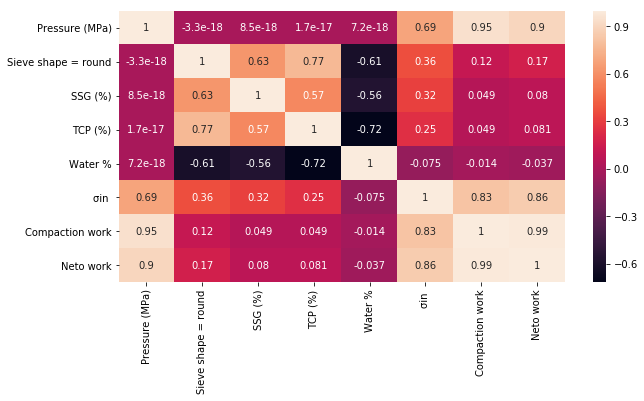

In [55]:
plot.rcParams["figure.figsize"] = [10,5]
sns.heatmap(d1.corr(), annot= True)

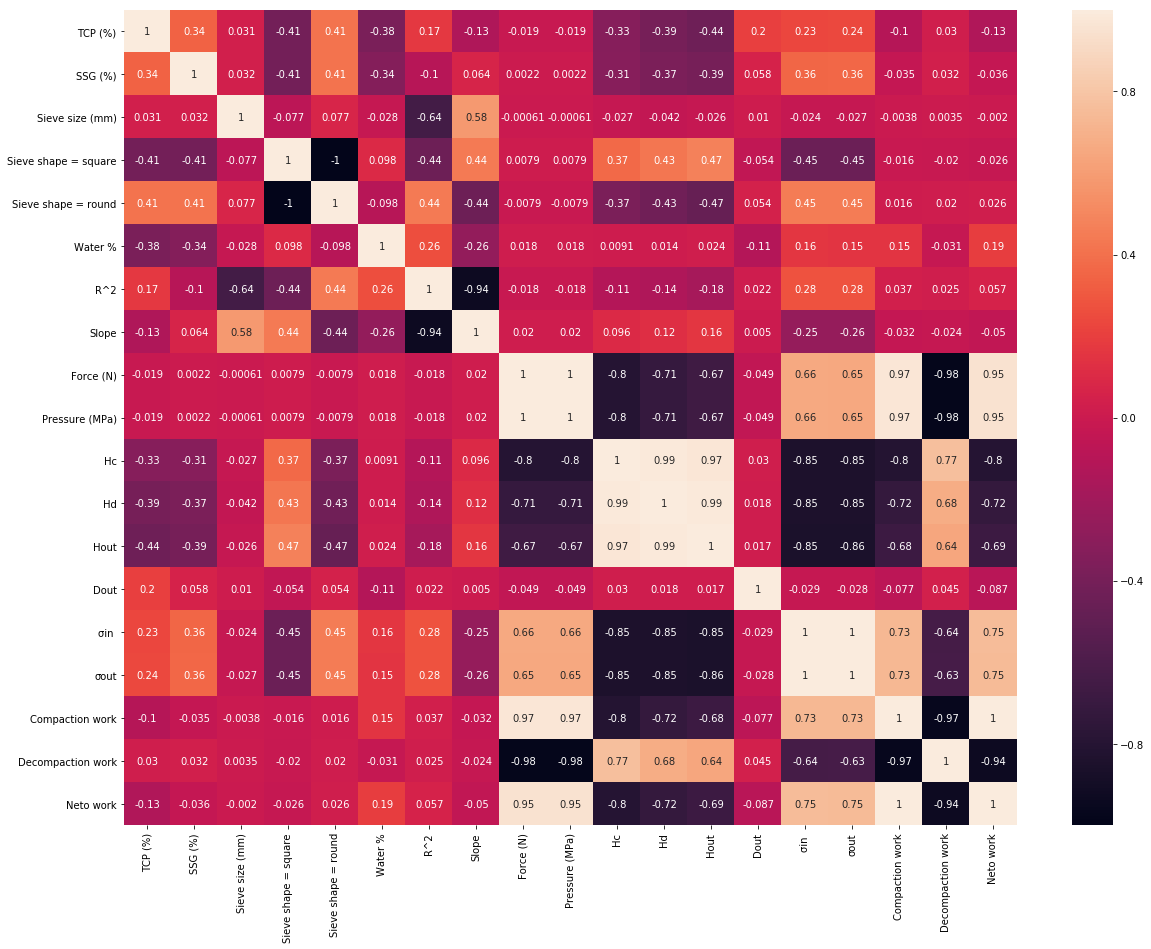

In [17]:
plot.rcParams["figure.figsize"] = [20,15]
sns.heatmap(data_L.corr(), annot= True)

In [20]:

X = pd.DataFrame(data_L[['Pressure (MPa)','Sieve shape = round','TCP (%)','Water %']])
y = pd.DataFrame(data_L['Compaction work'])

model = LinearRegression()
scores = []
mse_scores = []
kfold = KFold(n_splits=2, shuffle=True, random_state=42)

for i, (train, test) in enumerate(kfold.split(X, y)):
    model.fit(X.iloc[train,:], y.iloc[train,:])
    score = model.score(X.iloc[test,:], y.iloc[test,:])
    scores.append(score)
    #print(model.predict(X.iloc[test,:]).shape)
    #print(y.iloc[test,:].shape)
    
    #mse_scores.append(mse_score)

y_pred = cross_val_predict(model, X, y, cv=2)
mse_score = np.round(metrics.mean_squared_error(y,y_pred),2)
print(scores)
print(np.mean(scores))
print('MSE for test data:',mse_score)

[0.9596216686876103, 0.9627457653090864]
0.9611837169983484
MSE for test data: 0.03


In [21]:
from sklearn.cross_validation import train_test_split, ShuffleSplit
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

C:\Users\visha\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [26]:
X = pd.DataFrame(data_L[['Pressure (MPa)','Sieve shape = round','TCP (%)','Water %']])
y = pd.DataFrame(data_L['Compaction work'])

X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=4)
model_rr = Ridge(alpha=0.01)
model_rr.fit(X_train, y_train)

Ridge_train_score = model_rr.score(X_train,y_train)
Ridge_test_score = model_rr.score(X_test, y_test)
Predict_test_ridge = model_rr.predict(X_test)

print("Ridge regression train score:", Ridge_train_score)
print("Ridge regression test score:", Ridge_test_score)
print('RSquare value(test):',np.round(model_rr.score(X_test, y_test)*100,2))
print('MSE for test data:',np.round(metrics.mean_squared_error(y_test, Predict_test_ridge),2))

Ridge regression train score: 0.9764863256903229
Ridge regression test score: 0.9024217404173681
RSquare value(test): 90.24
MSE for test data: 0.03


In [27]:
X = pd.DataFrame(data_L[['Pressure (MPa)','Sieve shape = round','TCP (%)','Water %']])
y = pd.DataFrame(data_L['Compaction work'])

X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=4)
model_lr = Lasso()
model_lr.fit(X_train, y_train)
coeff_used = np.sum(model_lr.coef_!=0)

Lasso_train_score = model_lr.score(X_train,y_train)
Lasso_test_score = model_lr.score(X_test, y_test)
Predict_test_Lasso = model_lr.predict(X_test)

print("Lasso regression train score:", Lasso_train_score)
print("Lasso regression test score:", Lasso_test_score)
print("number of features used: ", coeff_used)
print('RSquare value(test):',np.round(model_lr.score(X_test, y_test)*100,2))
print('MSE for test data:',np.round(metrics.mean_squared_error(y_test, Predict_test_Lasso),2))

Lasso regression train score: 0.9559225068703298
Lasso regression test score: 0.8826686869196783
number of features used:  1
RSquare value(test): 88.27
MSE for test data: 0.03


In [28]:
X = pd.DataFrame(data_L[['Pressure (MPa)','Sieve shape = round','TCP (%)','Water %']])
y = pd.DataFrame(data_L['Compaction work'])

X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=4)
model_enr = ElasticNet()
model_enr.fit(X_train, y_train)

ElasticNet_train_score = model_enr.score(X_train,y_train)
ElasticNet_test_score = model_enr.score(X_test, y_test)
Predict_test_ElasticNet = model_enr.predict(X_test)

print("ElasticNet regression train score:", ElasticNet_train_score)
print("ElasticNet regression test score:", ElasticNet_test_score)
print('RSquare value(test):',np.round(model_enr.score(X_test, y_test)*100,2))
print('MSE for test data:',np.round(metrics.mean_squared_error(y_test, Predict_test_ElasticNet),2))

ElasticNet regression train score: 0.9576729512273076
ElasticNet regression test score: 0.880582923251521
RSquare value(test): 88.06
MSE for test data: 0.03


In [29]:
Data_P = data.loc[84:142]

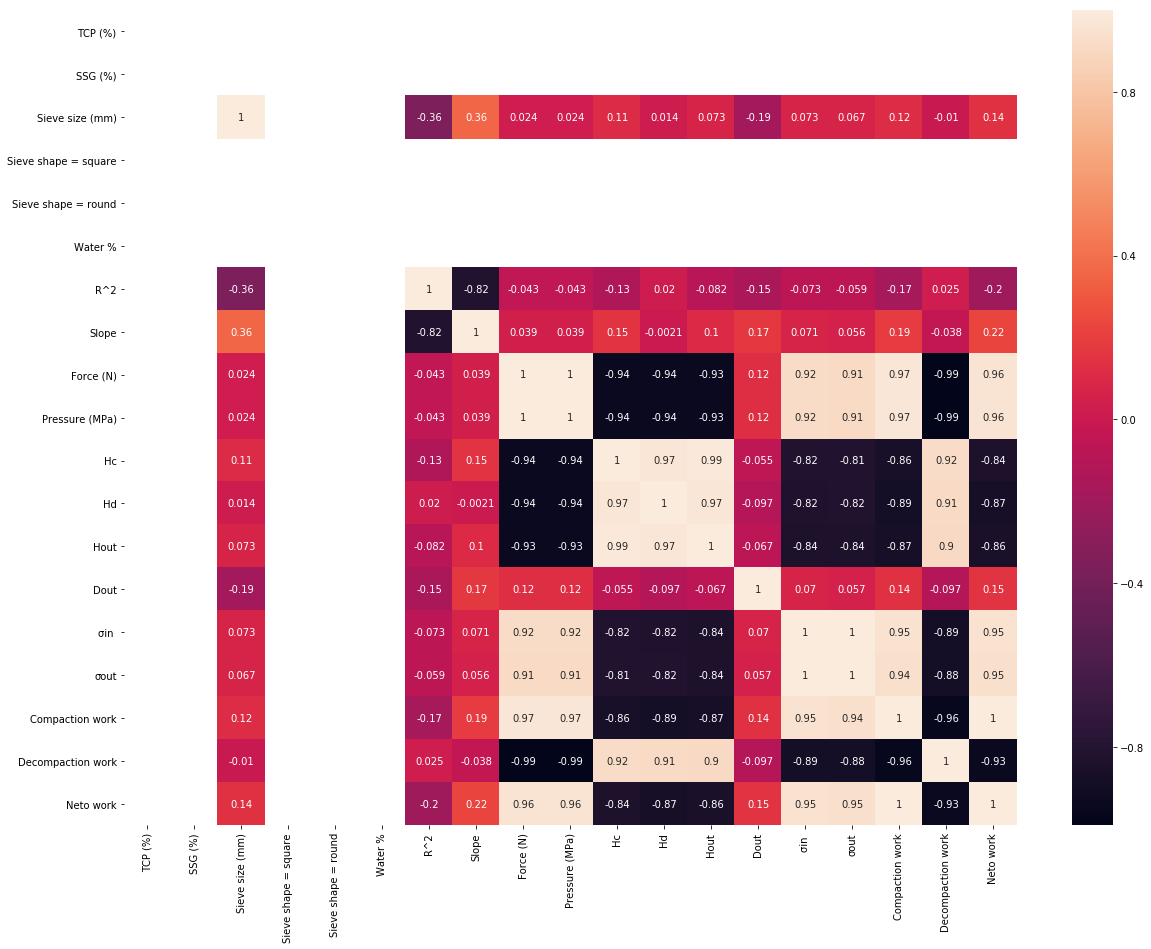

In [30]:
plot.rcParams["figure.figsize"] = [20,15]
sns.heatmap(Data_P.corr(), annot= True)

In [37]:

X = pd.DataFrame(Data_P[['Pressure (MPa)','Sieve shape = round','TCP (%)','Water %']])
y = pd.DataFrame(Data_P['Compaction work'])

model = LinearRegression()
scores = []
mse_scores = []
kfold = KFold(n_splits=2, shuffle=True, random_state=42)

for i, (train, test) in enumerate(kfold.split(X, y)):
    model.fit(X.iloc[train,:], y.iloc[train,:])
    score = model.score(X.iloc[test,:], y.iloc[test,:])
    scores.append(score)
    #print(model.predict(X.iloc[test,:]).shape)
    #print(y.iloc[test,:].shape)
    
    #mse_scores.append(mse_score)

y_pred = cross_val_predict(model, X, y, cv=2)
mse_score = np.round(metrics.mean_squared_error(y,y_pred),2)
print(scores)
print(np.mean(scores))
print('MSE for test data:',mse_score)

[0.9502174754478471, 0.9442657892635785]
0.9472416323557128
MSE for test data: 0.04


In [38]:
X = pd.DataFrame(Data_P[['Pressure (MPa)','SSG (%)']])
y = pd.DataFrame(Data_P['Compaction work'])

X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=4)
model_rr = Ridge(alpha=0.01)
model_rr.fit(X_train, y_train)

Ridge_train_score = model_rr.score(X_train,y_train)
Ridge_test_score = model_rr.score(X_test, y_test)
Predict_test_ridge = model_rr.predict(X_test)

print("Ridge regression train score:", Ridge_train_score)
print("Ridge regression test score:", Ridge_test_score)
print("number of features used: ", coeff_used)
print('RSquare value(test):',np.round(model_rr.score(X_test, y_test)*100,2))
print('MSE for test data:',np.round(metrics.mean_squared_error(y_test, Predict_test_ridge),2))

Ridge regression train score: 0.9267597461570031
Ridge regression test score: 0.9767900157105459
number of features used:  1
RSquare value(test): 97.68
MSE for test data: 0.01


In [39]:
X = pd.DataFrame(Data_P[['Pressure (MPa)','Sieve shape = round','SSG (%)','TCP (%)']])
y = pd.DataFrame(Data_P['Compaction work'])

X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=4)
model_lr = Lasso()
model_lr.fit(X_train, y_train)
coeff_used = np.sum(model_lr.coef_!=0)

Lasso_train_score = model_lr.score(X_train,y_train)
Lasso_test_score = model_lr.score(X_test, y_test)
Predict_test_Lasso = model_lr.predict(X_test)

print("Lasso regression train score:", Lasso_train_score)
print("Lasso regression test score:", Lasso_test_score)
print("number of features used: ", coeff_used)
print('RSquare value(test):',np.round(model_lr.score(X_test, y_test)*100,2))
print('MSE for test data:',np.round(metrics.mean_squared_error(y_test, Predict_test_Lasso),2))

Lasso regression train score: 0.9245515176609997
Lasso regression test score: 0.9726747043198442
number of features used:  1
RSquare value(test): 97.27
MSE for test data: 0.01


In [40]:
X = pd.DataFrame(Data_P[['Pressure (MPa)','Sieve shape = round','SSG (%)','TCP (%)']])
y = pd.DataFrame(Data_P['Compaction work'])

X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=4)
model_enr = ElasticNet()
model_enr.fit(X_train, y_train)

ElasticNet_train_score = model_enr.score(X_train,y_train)
ElasticNet_test_score = model_enr.score(X_test, y_test)
Predict_test_ElasticNet = model_enr.predict(X_test)

print("ElasticNet regression train score:", ElasticNet_train_score)
print("ElasticNet regression test score:", ElasticNet_test_score)
print("number of features used: ", coeff_used)
print('RSquare value(test):',np.round(model_enr.score(X_test, y_test)*100,2))
print('MSE for test data:',np.round(metrics.mean_squared_error(y_test, Predict_test_ElasticNet),2))

ElasticNet regression train score: 0.926190385617459
ElasticNet regression test score: 0.9753070672166528
number of features used:  1
RSquare value(test): 97.53
MSE for test data: 0.01


In [41]:
Data_C = data.loc[143:173]

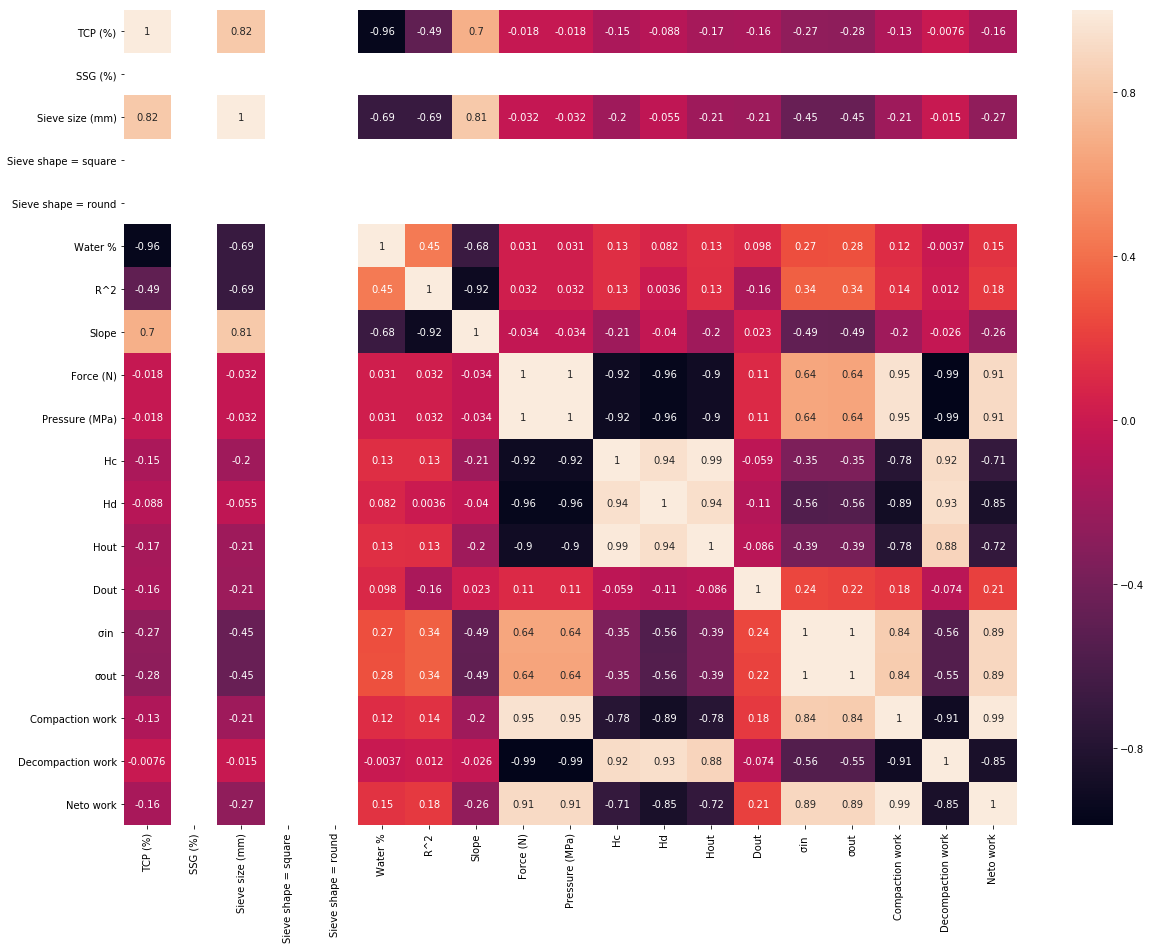

In [42]:
plot.rcParams["figure.figsize"] = [20,15]
sns.heatmap(Data_C.corr(), annot= True)

In [43]:
X = pd.DataFrame(Data_C[['Pressure (MPa)','Water %']])
y = pd.DataFrame(Data_C['Compaction work'])

model = LinearRegression()
scores = []
mse_scores = []
kfold = KFold(n_splits=2, shuffle=True, random_state=42)

for i, (train, test) in enumerate(kfold.split(X, y)):
    model.fit(X.iloc[train,:], y.iloc[train,:])
    score = model.score(X.iloc[test,:], y.iloc[test,:])
    scores.append(score)
    #print(model.predict(X.iloc[test,:]).shape)
    #print(y.iloc[test,:].shape)
    
    #mse_scores.append(mse_score)

y_pred = cross_val_predict(model, X, y, cv=2)
mse_score = np.round(metrics.mean_squared_error(y,y_pred),2)
print(scores)
print(np.mean(scores))
print('MSE for test data:',mse_score)

[0.908248610818892, 0.9231131656006684]
0.9156808882097802
MSE for test data: 0.37


In [44]:
X = pd.DataFrame(Data_C[['Pressure (MPa)','Sieve shape = round','SSG (%)','TCP (%)']])
y = pd.DataFrame(Data_C['Compaction work'])

X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=4)
model_rr = Ridge(alpha=0.01)
model_rr.fit(X_train, y_train)

Ridge_train_score = model_rr.score(X_train,y_train)
Ridge_test_score = model_rr.score(X_test, y_test)
Predict_test_ridge = model_rr.predict(X_test)

print("Ridge regression train score:", Ridge_train_score)
print("Ridge regression test score:", Ridge_test_score)
print("number of features used: ", coeff_used)
print('RSquare value(test):',np.round(model_rr.score(X_test, y_test)*100,2))
print('MSE for test data:',np.round(metrics.mean_squared_error(y_test, Predict_test_ridge),2))

Ridge regression train score: 0.9267597461570031
Ridge regression test score: 0.9767900157105459
number of features used:  1
RSquare value(test): 97.68
MSE for test data: 0.01


In [46]:
X = pd.DataFrame(Data_C[['Pressure (MPa)','Sieve shape = round','SSG (%)','TCP (%)']])
y = pd.DataFrame(Data_C['Compaction work'])

X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=4)
model_lr = Lasso()
model_lr.fit(X_train, y_train)
coeff_used = np.sum(model_lr.coef_!=0)

Lasso_train_score = model_lr.score(X_train,y_train)
Lasso_test_score = model_lr.score(X_test, y_test)
Predict_test_Lasso = model_lr.predict(X_test)

print("Lasso regression train score:", Lasso_train_score)
print("Lasso regression test score:", Lasso_test_score)
print("number of features used: ", coeff_used)
print('RSquare value(test):',np.round(model_lr.score(X_test, y_test)*100,2))
print('MSE for test data:',np.round(metrics.mean_squared_error(y_test, Predict_test_Lasso),2))

Lasso regression train score: 0.9034769452860768
Lasso regression test score: 0.9193984127701584
number of features used:  1
RSquare value(test): 91.94
MSE for test data: 0.02


In [47]:
X = pd.DataFrame(Data_C[['Pressure (MPa)','Sieve shape = round','SSG (%)','TCP (%)']])
y = pd.DataFrame(Data_C['Compaction work'])

X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=4)
model_enr = ElasticNet()
model_enr.fit(X_train, y_train)

ElasticNet_train_score = model_enr.score(X_train,y_train)
ElasticNet_test_score = model_enr.score(X_test, y_test)
Predict_test_ElasticNet = model_enr.predict(X_test)

print("ElasticNet regression train score:", ElasticNet_train_score)
print("ElasticNet regression test score:", ElasticNet_test_score)
print("number of features used: ", coeff_used)
print('RSquare value(test):',np.round(model_enr.score(X_test, y_test)*100,2))
print('MSE for test data:',np.round(metrics.mean_squared_error(y_test, Predict_test_ElasticNet),2))

ElasticNet regression train score: 0.9048636410105199
ElasticNet regression test score: 0.9151360339496191
number of features used:  1
RSquare value(test): 91.51
MSE for test data: 0.03
